Image Recognition
===

This notebook will create a convolutional neural network to classify images in either the mnist or cifar-10 datasets.

In [1]:
# Tensorflow and numpy to create the neural network
import tensorflow as tf
import numpy as np

# Matplotlib to plot info to show our results
import matplotlib.pyplot as plt

# OS to load files and save checkpoints
import os

%matplotlib inline

/home/student/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Loading the data
---

This code will load the dataset that you'll use to train and test the model.

The code provided will load the mnist or cifar data from files, you'll need to add the code that processes it into a format your neural network can use.

MNIST
---

Run this cell to load mnist data.

In [2]:
# Load MNIST data from tf examples

image_height = 28
image_width = 28

color_channels = 1

model_name = "mnist"

mnist = tf.contrib.learn.datasets.load_dataset("mnist")

train_data = mnist.train.images
train_labels = np.asarray(mnist.train.labels, dtype=np.int32)

eval_data = mnist.test.images
eval_labels = np.asarray(mnist.test.labels, dtype=np.int32)

category_names = list(map(str, range(10)))
print(np.shape(train_data))

# TODO: Process mnist data

def process_data(data):
    reshaped_data = np.reshape(data, (-1, color_channels, image_height, image_width))
    transpose_data = np.transpose(reshaped_data, [0,2,3,1])
    return transpose_data
    
train_data = process_data(train_data)
eval_data = process_data(eval_data)
print(np.shape(train_data))
# '(?, 28, 28, 1)'

Instructions for updating:
Please use tf.data.


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Instructions for updating:
Please write your own downloading logic.


Instructions for updating:
Please use tf.data to implement this functionality.


Extracting MNIST-data/train-images-idx3-ubyte.gz


Instructions for updating:
Please use tf.data to implement this functionality.


Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


(55000, 784)
(55000, 28, 28, 1)


CIFAR-10
---

Run this cell to load cifar-10 data

In [24]:
image_height = 32
image_width = 32
 
color_channels = 3
 
model_name = "cifar"
 
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict
 
cifar_path = './cifar-10-batches-py/'
 
train_data = np.array([])
train_labels = np.array([])
 
# Load all the data batches.
for i in range(1,6):
    data_batch = unpickle(cifar_path + 'data_batch_' + str(i))
    train_data = np.append(train_data, data_batch[b'data'])
    train_labels = np.append(train_labels, data_batch[b'labels'])
 
 
# Load the eval batch.
eval_batch = unpickle(cifar_path + 'test_batch')
 
eval_data = eval_batch[b'data']
eval_labels = eval_batch[b'labels'] 
 
# Load the english category names.
category_names_bytes = unpickle(cifar_path + 'batches.meta')[b'label_names']
category_names = list(map(lambda x: x.decode("utf-8"), category_names_bytes))
 
# TODO: Process Cifar data
 
def process_data(data):
    float_data = np.array(data, dtype=float) / 255.0
     
    reshaped_data = np.reshape(float_data, (-1, color_channels, image_height, image_width))
     
    transposed_data = np.transpose(reshaped_data, [0, 2, 3, 1])
    # plt.imshow(transposed_data[0])
    return transposed_data
 
 
train_data = process_data(train_data)
print(np.shape(train_data))

(50000, 32, 32, 3)


Once the data is processed, you have a few variables for the data itself and info about its shape:

### Model Info

- **image_height, image_width** - The height and width of the processed images
- **color_channels** - the number of color channels in the image. This will be either 1 for grayscale or 3 for rgb.
- **model_name** - either "cifar" or "mnist" - if you need to handle anything differently based on the model, check this variable.
- **category_names** - strings for each category name (used to print out labels when testing results)

### Training Data

- **train_data** - the training data images
- **train_labels** - the labels for the training data - the "answer key"

### Evaluation Data

- **eval_data** - Image data for evaluation. A different set of images to test your network's effectiveness.
- **eval_labels** - the answer key for evaluation data.

Building the Neural Network Model
--

Next, you'll build a neural network with the following architecture:

- An input placeholder that takes one or more images.
- 1st Convolutional layer with 32 filters and a kernel size of 5x5 and same padding
- 1st Pooling layer with a 2x2 pool size and stride of 2
- 2nd Convolutional layer with 64 filters and a kernel size of 5x5 and same padding
- 2nd Pooling layer with a 2x2 pool size and stride of 2
- Flatten the pooling layer
- A fully connected layer with 1024 units
- A dropout layer with a rate of 0.4
- An output layer with an output size equal to the number of labels.

In [3]:
# TODO: The neural network
class ConvNet:
     
    def __init__(self, image_height, image_width, channels, num_classes):
         
        self.input_layer = tf.placeholder(dtype=tf.float32, shape=[None, image_height, image_width, channels], 
                                          name="inputs")
        print(self.input_layer.shape)
         
        conv_layer_1 = tf.layers.conv2d(self.input_layer, filters=32, kernel_size=[5, 5], padding="same",
                                        activation=tf.nn.relu)
        print(conv_layer_1.shape)
         
        pooling_layer_1 = tf.layers.max_pooling2d(conv_layer_1, pool_size=[2,2], strides=2)
        print(pooling_layer_1.shape)
         
        conv_layer_2 = tf.layers.conv2d(pooling_layer_1, filters=64, kernel_size=[5, 5], padding="same",
                                        activation=tf.nn.relu)
        print(conv_layer_2.shape)
         
        pooling_layer_2 = tf.layers.max_pooling2d(conv_layer_2, pool_size=[2, 2], strides=2)
        print(pooling_layer_2.shape)
         
        flattened_pooling = tf.layers.flatten(pooling_layer_2)
        dense_layer = tf.layers.dense(flattened_pooling, 1024, activation=tf.nn.relu)
        print(dense_layer.shape)
        dropout = tf.layers.dropout(dense_layer, rate=0.4, training=True)
        outputs = tf.layers.dense(dropout, num_classes)
        print(outputs.shape)
         
        self.choice = tf.argmax(outputs, axis=1)
        self.probability = tf.nn.softmax(outputs)
         
        self.labels = tf.placeholder(dtype=tf.float32, name="labels")
        self.accuracy, self.accuracy_op = tf.metrics.accuracy(self.labels, self.choice)
         
        one_hot_labels = tf.one_hot(indices=tf.cast(self.labels, dtype=tf.int32), depth=num_classes)     
        self.loss = tf.losses.softmax_cross_entropy(onehot_labels=one_hot_labels, logits=outputs)
         
        optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-2)
        self.train_operation = optimizer.minimize(loss=self.loss, global_step=tf.train.get_global_step())

The Training Process
---

The cells below will set up and run the training process.

- Set up initial values for batch size, training length.
- Process data into batched datasets to feed into the network.
- Run through batches of training data, update weights, save checkpoints.

In [4]:
# TODO: initialize variables
training_steps = 20000
batch_size = 64
 
path = "./" + model_name + "-cnn/"
 
load_checkpoint = False

performance_graph = np.array([])

In [5]:
# TODO: implement the training loop
tf.reset_default_graph()
 
dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
dataset = dataset.shuffle(buffer_size=train_labels.shape[0])
dataset = dataset.batch(batch_size)
dataset = dataset.repeat()

 
dataset_iterator = dataset.make_initializable_iterator()
next_element = dataset_iterator.get_next()
 
cnn = ConvNet(image_height,image_width,color_channels,10)
 
saver = tf.train.Saver(max_to_keep=2)
 
if not os.path.exists(path):
    os.makedirs(path)

with tf.Session() as sess:

    if load_checkpoint:
        checkpoint = tf.train.get_checkpoint_state(path)
        saver.restore(sess, checkpoint.model_checkpoint_path)
    else:
        sess.run(tf.global_variables_initializer())

    sess.run(tf.local_variables_initializer())
    sess.run(dataset_iterator.initializer)
    for step in range(training_steps):
        current_batch = sess.run(next_element)

        batch_inputs = current_batch[0]
        batch_labels = current_batch[1]

        sess.run((cnn.train_operation, cnn.accuracy_op), feed_dict={cnn.input_layer:batch_inputs, cnn.labels:batch_labels})

        if step % 10 == 0:
            performance_graph = np.append(performance_graph, sess.run(cnn.accuracy))

        if step % 1000 == 0 and step > 0:
            current_acc = sess.run(cnn.accuracy)
            print("Accuracy at step " + str(step) + ": " + str(current_acc))
            print("Saving checkpoint")
            saver.save(sess, path + model_name, step)

    print("Saving final checkpoint for training session.")
    saver.save(sess, path + model_name, step)


(?, 28, 28, 1)
(?, 28, 28, 32)
(?, 14, 14, 32)
(?, 14, 14, 64)
(?, 7, 7, 64)
(?, 1024)
(?, 10)


Accuracy at step 1000: 0.8205204
Saving checkpoint


Accuracy at step 2000: 0.8832823
Saving checkpoint


Accuracy at step 3000: 0.91018736
Saving checkpoint


Accuracy at step 4000: 0.92537045
Saving checkpoint


Accuracy at step 5000: 0.93529123
Saving checkpoint


Accuracy at step 6000: 0.9425674
Saving checkpoint


Accuracy at step 7000: 0.9480172
Saving checkpoint


Accuracy at step 8000: 0.9523748
Saving checkpoint


Accuracy at step 9000: 0.95595175
Saving checkpoint


Accuracy at step 10000: 0.95889616
Saving checkpoint


Accuracy at step 11000: 0.96141326
Saving checkpoint


Accuracy at step 12000: 0.96353567
Saving checkpoint


Accuracy at step 13000: 0.96542
Saving checkpoint


Accuracy at step 14000: 0.96706367
Saving checkpoint


Accuracy at step 15000: 0.9685496
Saving checkpoint


Accuracy at step 16000: 0.9699114
Saving checkpoint


Accuracy at step 17000: 0.9711663
Saving checkpoint


Accuracy at step 18000: 0.97228175
Saving checkpoint


Accuracy at step 19000: 0.97329456
Saving checkpoint


Saving final checkpoint for training session.


Evaluating Performance
---

These cells will evaluate the performance of your network!

Text(0,0.5,'Accuracy')

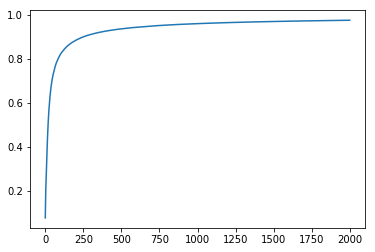

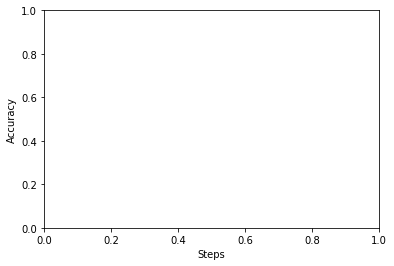

In [6]:

# TODO: Display graph of performance over time
plt.plot(performance_graph)
plt.figure().set_facecolor('white')
plt.xlabel("Steps")
plt.ylabel("Accuracy")

In [7]:
# TODO: Run through the evaluation data set, check accuracy of model
# Expand this code box to check your work!# TODO: Run through the evaluation data set, check accuracy of model
with tf.Session() as sess:
    checkpoint = tf.train.get_checkpoint_state(path)
    saver.restore(sess,checkpoint.model_checkpoint_path)
     
    sess.run(tf.local_variables_initializer())
     
    for image, label in zip(eval_data, eval_labels):
        sess.run(cnn.accuracy_op, feed_dict={cnn.input_layer:[image], cnn.labels:label})
     
    print(sess.run(cnn.accuracy))
     

INFO:tensorflow:Restoring parameters from ./mnist-cnn/mnist-19999


0.9882


INFO:tensorflow:Restoring parameters from ./mnist-cnn/mnist-19999


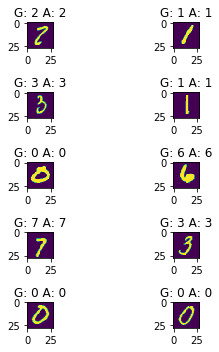

In [8]:
# TODO: Get a random set of images and make guesses for each
# Expand this box to check the final code for this cell.
# TODO: Get a random set of images and make guesses for each
with tf.Session() as sess:
    checkpoint = tf.train.get_checkpoint_state(path)
    saver.restore(sess,checkpoint.model_checkpoint_path)
     
    indexes = np.random.choice(len(eval_data), 10, replace=False)
     
    rows = 5
    cols = 2
     
    fig, axes = plt.subplots(rows, cols, figsize=(5,5))
    fig.patch.set_facecolor('white')
    image_count = 0
     
    for idx in indexes:
        image_count += 1
        sub = plt.subplot(rows,cols,image_count)
        img = eval_data[idx]
        if model_name == "mnist":
            img = img.reshape(28, 28)
        plt.imshow(img)
        guess = sess.run(cnn.choice, feed_dict={cnn.input_layer:[eval_data[idx]]})
        if model_name == "mnist":
            guess_name = str(guess[0])
            actual_name = str(eval_labels[idx])
        else:
            guess_name = category_names[guess[0]].decode('utf-8')
            actual_name = category_names[eval_labels[idx]].decode('utf-8')
        sub.set_title("G: " + guess_name + " A: " + actual_name)
    plt.tight_layout()